## TELECOM CUSTOMER CHURN PREDICTION

### Introduction
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.  Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty.

## Importing Libraries and dataset

In [1]:
# Loading libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [3]:
# Loading data
df = pd.read_csv("C:/Users/Eunice Nduati/Documents/Flatiron/Phase3/Telcom Customer Churn.csv")


## Data Understanding

In [4]:
# Checking the first five records in our dataset.
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# To check the number of columns and rows
df.shape

(3333, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [20]:
# see number of unique values in the dataframe columns
for column in df:
    print(column, ":", df[column].nunique())

state : 51
account length : 212
area code : 3
phone number : 3333
international plan : 2
voice mail plan : 2
number vmail messages : 46
total day minutes : 1667
total day calls : 119
total day charge : 1667
total eve minutes : 1611
total eve calls : 123
total eve charge : 1440
total night minutes : 1591
total night calls : 120
total night charge : 933
total intl minutes : 162
total intl calls : 21
total intl charge : 162
customer service calls : 10
churn : 2


In [8]:
#Check the data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Checking if there are missing values in our dataset. The data is clean there are no missing values in any columns.

In [9]:
# Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Checking if there are duplicates in our dataset.

In [10]:
#Checking for duplicates
df.duplicated().value_counts()

False    3333
dtype: int64

In [11]:
# Checking how our data looks like
df.shape

(3333, 21)

## Exploratory Data Analysis

1. Customers without a voice mail plan are more likely to churn as compared to those who have have subscribed to voice mail plan.

In [12]:
df.groupby(['voice mail plan', 'churn']).size()

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
dtype: int64

2. Most of the customers do not have an international plan. From the analysis, majority of the clients who have an international plan churn. This could be attributed to the clients not being citizens and are temporarily in the country.

In [13]:
df.groupby(['international plan', 'churn']).size()

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
dtype: int64

### Correlation
Using Seaborn, we can view plots of the correlation matrix using heatmaps. 
Correlation analysis allows us to identify to what extent and how variables are related to each other.

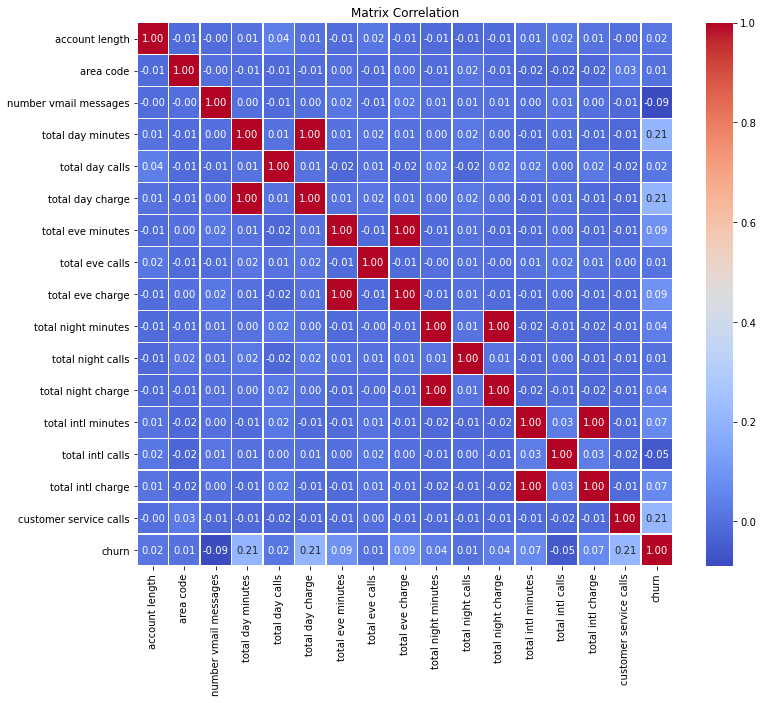

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize= (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Matrix Correlation')
plt.show()

The correlation coefficient between each pair of variables in the data. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

## Data Preprocessing
Before proceeding to the modeling stage, we need to ensure that all categorical data is represented in a form that can be processed by machine learning algorithms. One commonly used technique for this is label encoding.
Each category is given a unique numerical label, allowing machine learning algorithms to understand and process this information.


In [15]:
#we will apply label encoding to the categorical variables in our dataset before proceeding to the modeling stage.
df.select_dtypes(include=['object']).columns.tolist()


['state', 'phone number', 'international plan', 'voice mail plan']

In [16]:
#import library
from sklearn.preprocessing import LabelEncoder

df_categorical = df[['state', 'phone number','international plan', 'voice mail plan', 'churn']]
label_encoder = LabelEncoder()
data_encoded = df_categorical.apply(label_encoder.fit_transform)
df[['state', 'phone number','international plan', 'voice mail plan', 'churn']] = data_encoded
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



At this stage, we analyze the target column “churn” to understand the extent of class imbalance in the dataset. Class imbalance is important because it can affect the performance and final result of the prediction model.

In [17]:
#data distribution churn
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

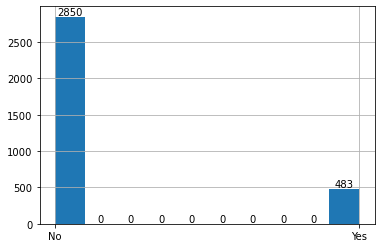

In [21]:
# Plot the histogram
ax = df['churn'].hist()

# Set the x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Display the values on top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{height:.0f}", ha='center', va='bottom')
    
# Show the plot
plt.show()

After examining the class distribution in the target column “churn”. The analysis results show that there is a significant imbalance between the “Not Churn = 0” and “Churn = 1” classes.

Class imbalance in the target column “churn” is a situation where one class has a significantly higher frequency than another. This can affect the performance of the prediction model, especially when the minor class has important information.

The next steps will consider suitable strategies to deal with class imbalance, such as SMOTE (Synthetic Minority Over-sampling Technique), an oversampling method used to handle class imbalance by creating synthetic samples for minor classes.

In [22]:
#import library
from sklearn.model_selection import train_test_split

X= df.drop('churn', axis = 1)# predictor variables
y = df['churn'] #target variable

#import more libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

#Initialize SMOTE
smote = SMOTE()

#fit predictor and target variables
X_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 2850, 1: 483})
Resample dataset shape: Counter({0: 2850, 1: 2850})


### Data split with train_test_split
‘Train_test_split’ allows us to split the dataset into two parts: one for training the model and another for testing the model’s performance. The function takes some important arguments such as the dataset to split, the label, the size of the test set, and the random_state to ensure reproducible results.

In [24]:
# Divide data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size = 0.7, test_size = 0.3, random_state = 0)
#summary
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3989, 20) (3989,)
(1710, 20) (1710,)


This data split is important to avoid overfitting and ensure the developed model performs well on data that has never been seen before.

## Modeling and Prediction

### 1. Logistic Regression
Logistic regression uses a logistic function to generate the probability that an instance or sample belongs to a positive class. The sigmoid function maps input values to the range (0,1), which can be interpreted as probabilities.

In [25]:
# Import relevant classes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Instantiate the model
logreg = LogisticRegression()

# Fit the data
logreg.fit(X_train, y_train)

#Find the accuracy of the model
accuracy_logreg = logreg.score(X_test, y_test)
print("Logistic Regression accuracy is :",accuracy_logreg)

Logistic Regression accuracy is : 0.6795321637426901


In [26]:
#Perform model prediction
logreg_pred = logreg.predict(X_test)
report = classification_report(y_test, logreg_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       849
           1       0.68      0.68      0.68       861

    accuracy                           0.68      1710
   macro avg       0.68      0.68      0.68      1710
weighted avg       0.68      0.68      0.68      1710



### 2. Decision Tree Model
Decision Tree is a classification algorithm that divides data into smaller subsets based on the decision rules generated.

In [27]:
# Import class
from sklearn.tree import DecisionTreeClassifier

#Instantiate the model
dt = DecisionTreeClassifier()

#Fit the data
dt.fit(X_train, y_train)

# Run model prediction and accuracy
predictdt_y = dt.predict(X_test)
accuracy_dt = dt.score (X_test, y_test)
print('Decision Tree accuracy is:', accuracy_dt)

Decision Tree accuracy is: 0.8532163742690059


Decision Tree Classifier Model has a higher accuracy than Logistic regression model.

In [28]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       849
           1       0.84      0.87      0.86       861

    accuracy                           0.85      1710
   macro avg       0.85      0.85      0.85      1710
weighted avg       0.85      0.85      0.85      1710



### 3. Random Forest Classifier
Random Forest Classifier is a type of ensemble model that combines multiple decision trees to achieve better and more stable predictions. Each tree performs a prediction, and the final result is the majority result of all trees.

In [29]:
# Import class
from sklearn.ensemble import RandomForestClassifier

#Instantiate the model
rf = RandomForestClassifier(random_state = 42)

#Fit the data in the model
rf.fit(X_train, y_train)

#Run model prediction and accuracy
y_pred = rf.predict(X_test)

rf_accuracy = rf.score(X_test, y_test)
print('Random Forest accuracy is:', rf_accuracy)

Random Forest accuracy is: 0.9192982456140351


The Random Forest Classifier model successfully predicts with an accuracy rate of about 92.04%.

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       849
           1       0.95      0.89      0.92       861

    accuracy                           0.92      1710
   macro avg       0.92      0.92      0.92      1710
weighted avg       0.92      0.92      0.92      1710



This means that the Random Forest model successfully predicts with an accuracy rate of about 92.04%.

This high accuracy result shows that the  model is very effective in predicting the likelihood of churn. This is an excellent result and makes this model a strong choice in modeling this case.

After trying several models, we decided to choose the Random Forest model as the main model to predict the probability of churn in the dataset.

In [31]:
#Let's now predict the final model based on highest majority of voting and check it's score
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8695906432748538


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       849
           1       0.87      0.87      0.87       861

    accuracy                           0.87      1710
   macro avg       0.87      0.87      0.87      1710
weighted avg       0.87      0.87      0.87      1710



### Confusion Matrix

Confusion matrix is a table that describes the performance of the model on test data, comparing the predicted results with the true values. 

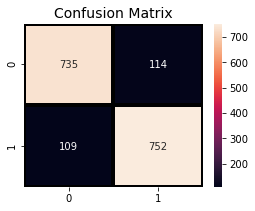

In [33]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
           annot = True, fmt = 'd', linecolor = 'k', linewidths = 3)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

From the confusion matrix we can see that: 
There are total 758+91= 849 actual non-churn values and the algorithm predicts 758 of them as non churn and 91 of them as churn.
While there are 85+776= 861 actual churn values and the algorithm predicts 85 of them as non churn values and 776 of them as churn values.

## Conclusion on Model Performance

Upon reviewing the results, the top performing models in ranking from highest to lowest based on the provided metrics are:

    1. Random Forest Classifier
    
Is ranked first among the models:

Precision Score: 0.90
Recall Score: 0.95
F1 Score: 0.92
Accuracy: 0.92
The Random Forest Classifier Model achieves a decent F1-score of 0.92. It shows a reasonable balance between precision and recall, indicating that the model can make accurate predictions while capturing a good proportion of positive cases. The overall accuracy of 0.92 suggests that the model performs well in classifying churn.

    2. Decision Tree Classifier

Precision Score: 0.87
Recall Score: 0.83
F1 Score: 0.85
Accuracy: 0.85

The Decision Tree Classifier model demonstrates a slightly lower F1-score of 0.85 compared to Random Forest Classifier. It achieves a relatively lower precision score, indicating that it has a lower probability of correctly identifying positive cases. However, the recall score suggests that it may miss some positive cases. The accuracy of 0.85 suggests good overall performance.

     3.Logistic Regression

Precision Score: 0.68
Recall Score: 0.68
F1 Score: 0.68
Accuracy: 0.68
The Logistic Regression model achieves the lowest F1-score among the three models, with a value of 0.68. It shows relatively lower precision and recall scores, indicating that the model may struggle with accurately identifying positive cases. The accuracy of 0.68 suggests moderate performance.
 

### Recommendations:
1. Use Random Forest Classifier for future prediction.
2. Encourage more customers to subscribe to voicemail plan.
3. Consider coverage outside the country to retain temporal customers from abroad. 
